Author :Megha sharma

Marketing analytics is the study of data to evaluate the performance of a marketing activity. By applying technology and analytical processes to marketing-related data, businesses can:

1) Explore distributions, segment-wise preferences of customers, advertising expenses segments and performances, etc.

2) Explore offers_accepted/customer profile, customer_profile/amount spent on products relationship.

3) Explore bivariate or cross-segment relations such as, how deals, customer profile variables, and length of customer association with the company affects their behavior. Learn about cross-tabulation.

4) Explore what modeling opportunities you can create between the different variables.

Analysis Process
1. Assessing and Cleaning the data

2. Exploratory data analysis

3. Data Visualization and Further Analysis



# Exploratory Data Analysis

1) Are there any null values ?
2) Are there any variables that need transformations?
3) Do you notice any patterns or anomalies in the data? Can you plot them?


# Data Visualization

Please plot and visualize the answers to the below questions.:

1) Which marketing campaign is most successful?

2) What does the average customer look like for this company?

3) Which products are performing best?

4) Which channels are underperforming?

Dataset
1) Before beginning the analysis, we will load and view the dataset, and perform some initial cleaning.


In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.plotting.backend = "plotly"
import plotly.express as px

Import data

In [72]:
df = pd.read_csv("E:/projects with mentor bruh/2nd project/archive (2)/ifood_df.csv")

# DATA CLEANING

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [74]:
df.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0


Clean up column names


In [75]:
#stripping columns of any whitespace
df.columns = df.columns.str.replace(" ","")

In [76]:
#we will check if there any duplicates,and drop them
df.duplicated().any()
df= df.drop_duplicates()

In [77]:
#unique values of each column
for col in df.columns:
    print('{} :{}'.format(col,df[col].unique()))

Income :[58138. 46344. 71613. ... 56981. 69245. 52869.]
Kidhome :[0 1 2]
Teenhome :[0 1 2]
Recency :[58 38 26 94 16 34 32 19 68 59 82 53 23 51 20 91 86 41 42 63  0 69 89  4
 96 56 31  8 55 37 76 99  3 88 72 24 92 39 29  2 54 57 30 12 18 75 90  1
 40  9 87  5 95 48 70 79 84 44 43 35 15 17 46 27 25 74 85 65 13 83 10 21
 61 73 47 36 49 28 64 78 77 81 80 45 14 52 98 93 50 60 11 66 97 62  6 33
 22 71 67  7]
MntWines :[ 635   11  426  173  520  235   76   14   28    6  194  233    3 1006
   53   84 1012    4   86    1  867  384  270   36  684    8  112  110
   96  482   40  702   55  437  421   13    9  123  826  245  650   12
  510  328  984  295  447  712  452  523  546  398   10  688  247  856
  496  258  565    2  721 1032  577   64   25  163   17  130  292  350
  135   15   27    5  505   51  207   41  386  562  217  144  454  425
 1332  527  490  378  547   47  320   34  722  162  450   70  492  120
  534  236  220  796    0  962  738  399  614   32  598   73   42  346
  888  997  212 

In [78]:
#weWill drop column few columns which deem unnecessary
df1 = df.drop(['Z_CostContact','Z_Revenue','AcceptedCmpOverall','MntTotal'],axis = 1)

In [79]:
#looking for null values
df1.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2nCycle       0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntRegularProds         0
dtype: int64

There are variables that I can choose to engineer with the given data?
Review a list of the feature names below, from which we can engineer:

The total number of dependents in the home ('UnderAge') can be engineered from the sum of 'Kidhome' and 'Teenhome'.

The year of becoming a customer (['Education qualification']) can be engineered from 'education_2nCycle','education_Basic','education_Graduation','education_PhD','education_Master'

The total amount spent ('Marital_status') can be engineered from the sum of all features containing the keyword 'Mnt'

The total amount spent ('Income_range') can be engineered from the sum of all features containing the keyword Income

The total amount spent (Age_range) can be engineered from the sum of all features containing the keyword Age

The total number of deals purchases accepted ('NumDealsPurchases range') can be engineered from the Inter quartile range of column NumDealsPurchases 

The total number of deals purchases accepted (NumStorePurchases range) can be engineered from the Inter quartile range of column NumStorePurchases

The total number of deals purchases accepted (NumWebPurchases range) can be engineered from the Inter quartile range of column NumWebPurchases range
 the total acceptance campain number combining all the columns describing data related to accpetance 



# Perform feature engingeering as outlined in notes above:

# Column :MARITAL STATUS

as we can see none of the rows have conflict regarding single and together,married and divorced,married and widow


In [80]:
df2 = df1.copy()
indexage = df2[((df2['marital_Divorced']) == 0) & ((df2['marital_Married']) == 0) & ((df2['marital_Widow']) == 0) & ((df2['marital_Together']) == 0) & ((df2['marital_Single']) == 0)].index
indexage.shape

(0,)

In [81]:
#In the same we observe that none of the rows have conflicat regarding married and divorced,married and widow and single and married
indexage1 = df2[((df2['marital_Married']) == 1) & ((df2['marital_Divorced']) == 1)].index
indexage1.shape

(0,)

In [82]:
k = df[['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow']]
df2['marital_status'] =k[k.columns[:]].apply(lambda x: ','.join(x.dropna().astype(int).astype(str)),axis=1)
df2['marital_status']= df2['marital_status'].astype(str)

In [83]:
df2['marital_status'].unique()

array(['0,0,1,0,0', '0,0,0,1,0', '0,1,0,0,0', '1,0,0,0,0', '0,0,0,0,1'],
      dtype=object)

In [84]:
df2['Marital_status'] = np.where((df2['marital_status'] == '1,0,0,0,0'),'Divorced',np.where((df2['marital_status'] == '0,1,0,0,0'),'Married',np.where((df2['marital_status'] == '0,1,0,0,0'),'Single',np.where((df2['marital_status'] == '0,0,0,1,0'),'Together','Widow'))))

In [85]:
df2['Marital_status'].unique()

array(['Widow', 'Together', 'Married', 'Divorced'], dtype=object)

In [86]:
#now we will drop the columns 'marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow','martial_status'
df2 = df2.drop(['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow','marital_status'],axis = 1)

# Column :EDUCATIONAL LEVEL

#As we will see no columns have anything in common

In [87]:
#as we can see none of the rows have conflicat regarding basic,graduation,masters,2ncycle,PhD or pitting any 2 of those
index1 = df2[((df2['education_Basic']) == 0) & ((df2['education_Graduation']) == 0) & ((df2['education_2nCycle']) == 0) & ((df2['education_PhD']) == 0) & ((df2['education_Master']) == 0)].index
index1.shape

(0,)

In [88]:
#As we can see no columns have anything in common
s = df[['education_2nCycle','education_Basic','education_Graduation','education_PhD','education_Master']]
df2['Education level'] =s[s.columns[:]].apply(lambda x: ','.join(x.dropna().astype(int).astype(str)),axis=1)
df2['Education level']= df2['Education level'].astype(str)

In [89]:
df2['Education level'].unique()

array(['0,0,1,0,0', '0,0,0,1,0', '0,0,0,0,1', '0,1,0,0,0', '1,0,0,0,0'],
      dtype=object)

In [90]:
df2['Education qualification'] = np.where((df2['Education level'] == '1,0,0,0,0'),'Master',np.where((df2['Education level'] == '0,1,0,0,0'),'Basic',np.where((df2['Education level'] == '0,0,1,0,0'),'Graduation',np.where((df2['Education level'] == '0,0,0,1,0'),'PhD','Master'))))

In [91]:
df2['Education qualification'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

In [92]:
#now we will drop the columns education_2nCycle','education_Basic','education_Graduation','education_PhD','education_Master','Education level'
df2 = df2.drop(['education_2nCycle','education_Basic','education_Graduation','education_PhD','education_Master','Education level'],axis = 1)

We will make new columns for kids ,with both minors or teens

In [93]:
df2["Underage"] = df2.Kidhome + df2.Teenhome
df2["Underage"].unique()

array([0, 2, 1, 3], dtype=int64)

We Will create new columns ,to convert the existing numerical columns to categorical 
Now We used Interquartile ranges to divide the prexisting numerical columns ot categorical ones.

We will start with 'income' column

In [94]:
df2['Income_range'] = pd.cut(df2.Income,[1730.000000,35416.000000,51412.000000,68274.000000,113734.000000],4,labels=['<35416.000000','35416- 51412','51412-68274','>68274'])
df2['Income_range'].unique()

['51412-68274', '35416- 51412', '>68274', '<35416.000000', NaN]
Categories (4, object): ['<35416.000000' < '35416- 51412' < '51412-68274' < '>68274']

Cutting the Age column into 4 different parts

In [95]:
df2['Age_range'] = pd.cut(df2.Age,[24.000000,43.000000,50.000000,61.000000,80.000000],5,labels=['20-45','45-50','50-61','>61'])
df2['Age_range'].unique()

['>61', '50-61', '20-45', '45-50', NaN]
Categories (4, object): ['20-45' < '45-50' < '50-61' < '>61']

Cutting the NumDealsPurchases column into 4 different parts

In [96]:
df2['NumDealsPurchases range'] = pd.cut(df2.NumDealsPurchases,[0,3,15],34,labels=['<=3','>3'])
df2['NumDealsPurchases range'].unique()

['<=3', '>3', NaN]
Categories (2, object): ['<=3' < '>3']

Cutting the NumStorPurchases column into 4 different parts

In [97]:
df2['NumStorePurchases range'] = pd.cut(df2['NumStorePurchases'],[2,4,6,9,13],5,labels=['<=4','4-6','6-9','>9'])
df2['NumStorePurchases range'].unique()

['<=4', NaN, '>9', '4-6', '6-9']
Categories (4, object): ['<=4' < '4-6' < '6-9' < '>9']

Cutting the NumWebPurchases column into 4 different parts

In [98]:
df2['NumWebPurchases range'] = pd.cut(df2.NumWebPurchases,[1,2,4,6,11],4,labels=['<2','2-4','4-6','6-11'])
df2['NumWebPurchases range'].unique()

['6-11', NaN, '<2', '4-6', '2-4']
Categories (4, object): ['<2' < '2-4' < '4-6' < '6-11']

In [99]:
df2 = df2.dropna()

In [100]:
df2['Total_Mnt'] =df2['MntMeatProducts']+df2['MntFishProducts']+df2['MntSweetProducts']+df2['MntGoldProds']+df2['MntWines']+df2['MntFruits']+df2['MntRegularProds'] 
df2['Total_num_purchase'] = df2['NumDealsPurchases'] + df2['NumWebPurchases'] +df2['NumStorePurchases'] +df2['NumCatalogPurchases'] +df2['NumWebVisitsMonth']
df2['accepted_overall'] = df2['AcceptedCmp3'] + df2['AcceptedCmp1'] +  df2['AcceptedCmp2'] + df2['AcceptedCmp4'] + df2['AcceptedCmp5'] 

# EDA 

Using Python to conduct EDA, perform statistical analysis, visualize insights, and present data-driven solutions to Chief Marketing Officer in the company

Also, since this is a marketing data set, we can categorize the variables in terms of the 4 P's of marketing: products, people (customers), places (channels), and promotions (discounts & campaigns). The point of categorization is to expand the analyst's perspective. It might also serve as a good way to segment analytical steps further down the line in EDA or statistical analysis.

# People

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Recency: Number of days since customer's last purchase

Complain: 1 if customer complained in the last 2 years, 0 otherwise


# Products

MntWines: Amount spent on wine in the last 2 years

MntFruits: Amount spent on fruits in the last 2 years

MntMeatProducts: Amount spent on meat in the last 2 years

MntFishProducts: Amount spent on fish in the last 2 years

MntSweetProducts: Amount spent on sweets in the last 2 years

MntGoldProds: Amount spent on gold in the last 2 years

# Place

NumWebPurchases: Number of purchases made through the company's web site

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company's web site in the last month

NumDealsPurchases: Number of purchases made with a discount


# Promotion

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise



Creating some new columns

# Univariate Analysis
# Section : People

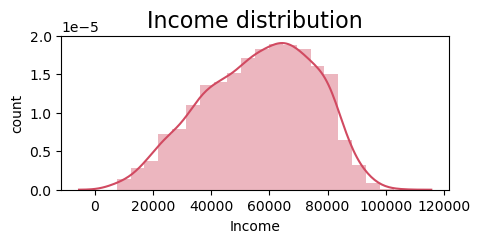

In [132]:
plt.figure(figsize=(5,2))
sns.distplot(df2['Income'], kde=True, hist=True,color = '#d14a61')
plt.title('Income distribution', size=16)
plt.ylabel('count');

The above histogram displays Distribution of income of different customers

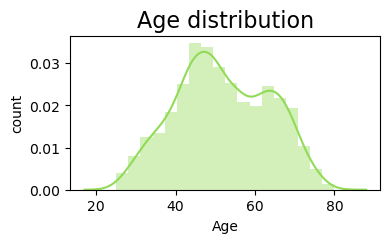

In [103]:
plt.figure(figsize=(4,2))
sns.distplot(df2['Age'], kde=True, hist=True,color ='#91db57')

plt.title('Age distribution', size=16)
plt.ylabel('count');

The above histogram displays Distribution of age of different customers

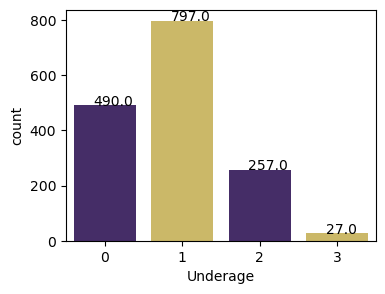

In [104]:
plt.figure(figsize = (4,3))
ax = sns.countplot(df2['Underage'],palette=['#432371','#dbc257'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

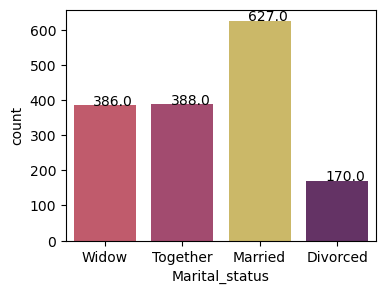

In [133]:
plt.figure(figsize = (4,3))
ax = sns.countplot(df2['Marital_status'],palette = ['#d14a61', '#b13c6c', '#dbc257', '#6c2b6d'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Most of the households have 1 underage kid, min households have 3 kids

more than 200 people ,are married and approx 100 are divorced.
number of people who are widow or together lie between 100-200

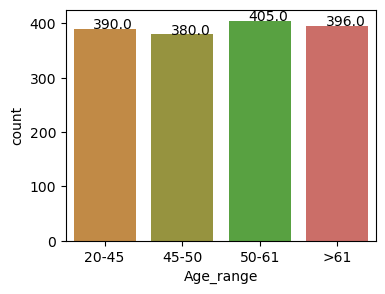

In [134]:
plt.figure(figsize = (4,3))
ax = sns.countplot(df2['Age_range'],palette = ['#d58c32', '#a4a031', '#50b131', '#db5f57'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.25,p.get_height() + 0.01))
    
plt.show()


Most of the customers lie between 50-61 (people who can still be classified as working class)
People age 20-45 ,count to approx 125 from total

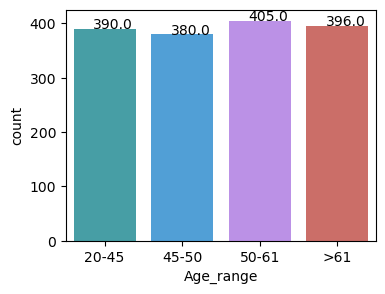

In [135]:
plt.figure(figsize = (4,3))
ax = sns.countplot(df2['Age_range'],palette = ['#37abb5', '#3ba3ec', '#bb83f4','#db5f57'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))

plt.show()

# Univariate Analysis
# Section : Products

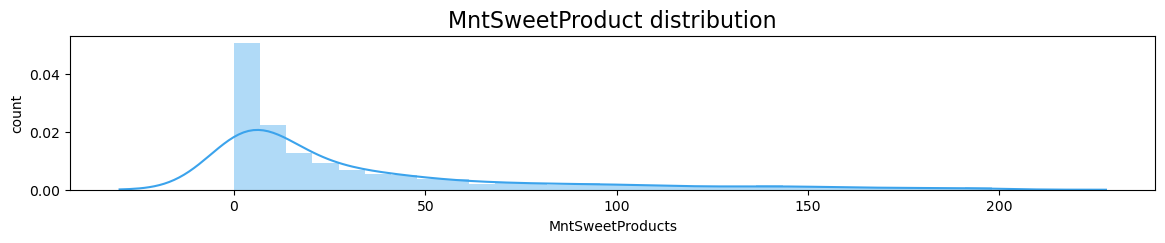

In [136]:
plt.figure(figsize=(14,2))
sns.distplot(df2['MntSweetProducts'], kde=True,color ='#3ba3ec', hist=True)
plt.title('MntSweetProduct distribution', size=16)
plt.ylabel('count');

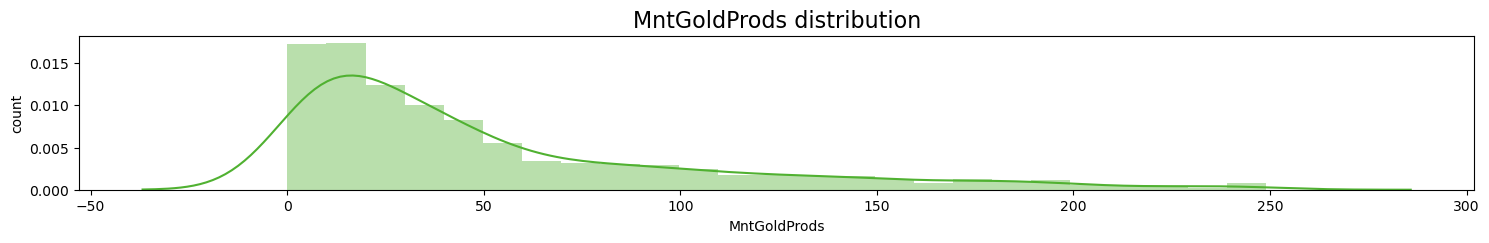

In [110]:
plt.figure(figsize=(18,2))
sns.distplot(df2['MntGoldProds'], kde=True,color =  '#50b131', hist=True)
plt.title('MntGoldProds distribution', size=16)
plt.ylabel('count');

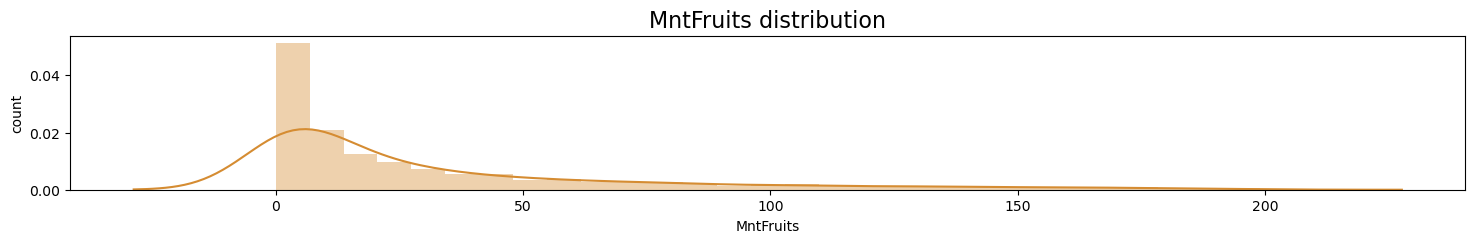

In [111]:
plt.figure(figsize=(18,2))
sns.distplot(df2['MntFruits'], kde=True,color ='#d58c32', hist=True)
plt.title('MntFruits distribution', size=16)
plt.ylabel('count');

What other factors are significantly related to amount spent on fish?

Like with the analysis of NumStorePurchases above, we will use use a linear regression model with MntFishProducts as the target variable, and then use machine learning explainability techniques to get insights about which features predict the amount spent on fish
Begin by plotting the target variable:

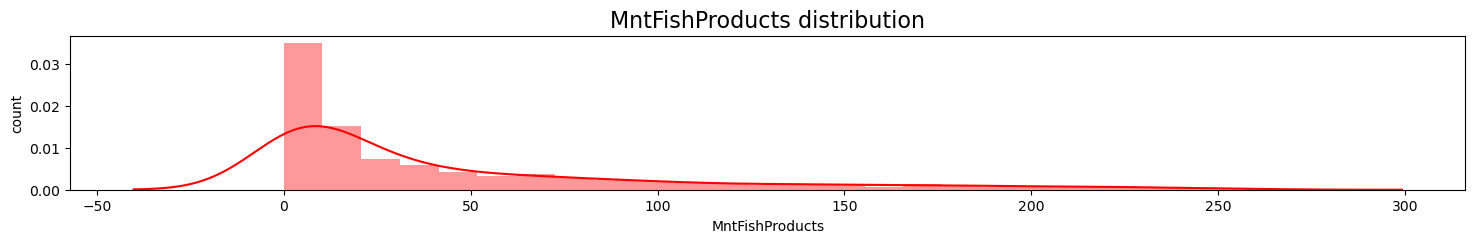

In [112]:
plt.figure(figsize=(18,2))
sns.distplot(df2['MntFishProducts'], kde=True,color = "red", hist=True)
plt.title('MntFishProducts distribution', size=16)
plt.ylabel('count');

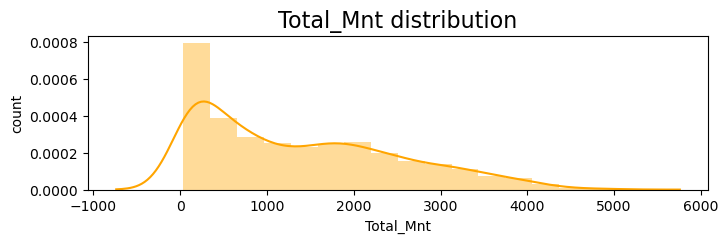

In [113]:
plt.figure(figsize=(8,2))
sns.distplot(df2['Total_Mnt'], kde=True,color = "orange", hist=True)
plt.title('Total_Mnt distribution', size=16)
plt.ylabel('count');

# Univariate Analysis
# Section : Promotion

Please plot and visualize the answers to the below questions.

Which marketing campaign is most successful?

Plot marketing campaign overall acceptance rates:

Findings: The most successful campaign is the most recent (column name: Response)

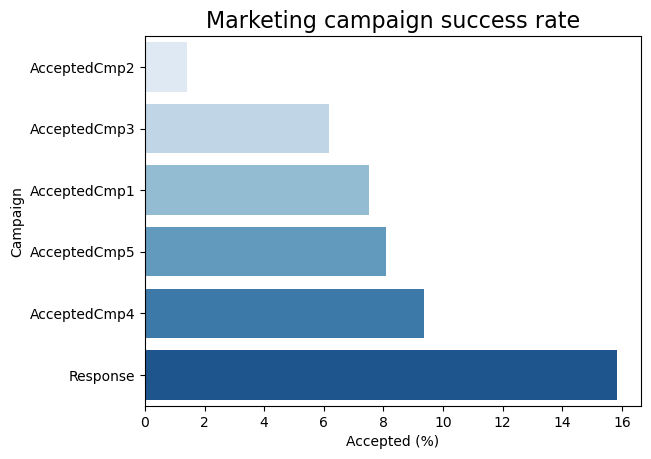

In [114]:
# calculate success rate (percent accepted)
cam_success = pd.DataFrame(df2[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette='Blues')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16);

# BIVARITE ANALYSIS

# Section : People

In [115]:
pd.crosstab(df2['Age_range'],df2['Income_range'],dropna=True, normalize=False)

Income_range,<35416.000000,35416- 51412,51412-68274,>68274
Age_range,,,,
20-45,105,90,72,123
45-50,67,97,117,99
50-61,43,92,149,121
>61,26,87,150,133


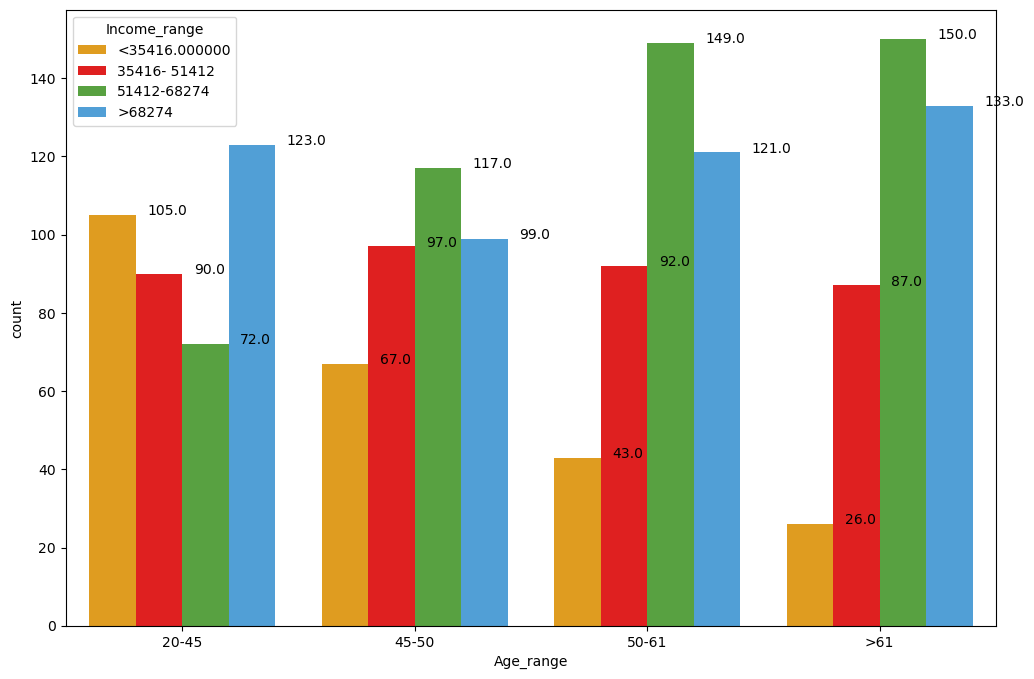

In [138]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x='Age_range', hue='Income_range', data=df2,palette = ["orange","red",'#50b131','#3ba3ec'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))

plt.show()

age group of 20-45 seems to have highest earning Within income Range < 35416,

age group of 45-50 seems to have highest earning Within income Range 35416 - 51412,

age group of 50-60 seems to have highest earning Within income Range 51412-68274,

age group of >60 seems to have highest earning Within income Range > 68274

As we can see the distirbution of age and income doesnt have equal intervals,It is because the the grous are cut according to IQR.But these clearly show that results are accurate. 
I mean people do get higher packages ,but many of those earn with promotions ,walking the ranks up in their .AS we can see working class 50-61 has highest number of people earning within range of 51412-68274

# BIVARITE ANALYSIS

# Section : Products

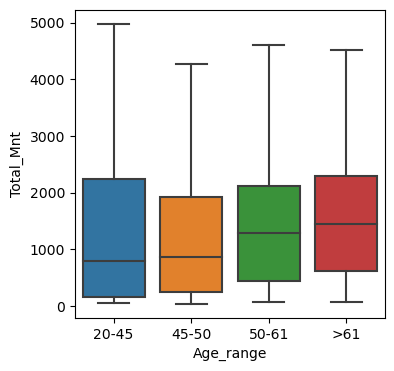

In [118]:
#Plot illustrating different age groups(based on interquartile ranges) on spending their money
plt.figure(figsize=(4,4))
sns.boxplot(x='Age_range', y='Total_Mnt', data=df2);

Findings:

Patterns:
1. High-Income People

— tend to spend more and purchase more.

— tend to visit the company’s website less frequently than other people.

— tend to has few numbers of purchases made with a discount

2. People having kids at home

— tend to spend less and purchase less.

— tend to has a high number of purchases made with a discount


3. People who purchased with high average order volume

— tend to buy more wines and meat products

— tend to make a high number of purchases made using a catalog

— tend not to visit the company’s website.

# BIVARITE ANALYSIS

# Section : Place

In [119]:
pd.crosstab(df2['NumWebPurchases range'],df2['Marital_status'],dropna=True, normalize=False)

Marital_status,Divorced,Married,Together,Widow
NumWebPurchases range,,,,
<2,35,128,68,73
2-4,45,203,134,135
4-6,42,148,83,100
6-11,48,148,103,78


In [120]:
pd.crosstab(df2['NumStorePurchases range'],df2['Marital_status'],dropna=True, normalize=False)

Marital_status,Divorced,Married,Together,Widow
NumStorePurchases range,,,,
<=4,56,212,128,132
4-6,38,136,91,80
6-9,37,142,83,90
>9,39,137,86,84


What factors are significantly related to the number of store purchases?

We will use use a linear regression model with NumStorePurchases as the target variable, and then use machine learning explainability techniques to get insights about which features predict the number of store purchases
Begin by plotting the target variable:

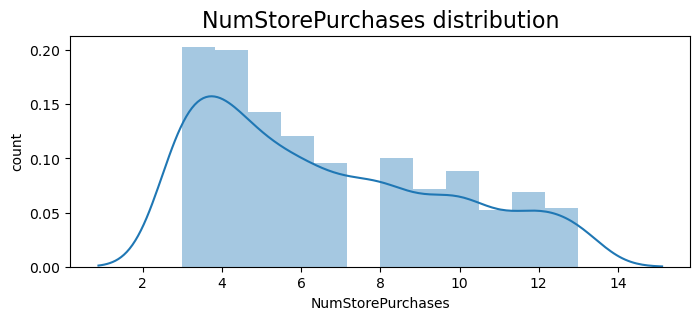

In [121]:
plt.figure(figsize=(8,3))
sns.distplot(df2['NumStorePurchases'], kde= True, hist=True)
plt.title('NumStorePurchases distribution', size=16)
plt.ylabel('count');

# BIVARITE ANALYSIS

# Section : Promotion

In [122]:
pd.crosstab(df2['accepted_overall'],df2['Income_range'],dropna=True, normalize=False)

Income_range,<35416.000000,35416- 51412,51412-68274,>68274
accepted_overall,,,,
0,234,315,385,284
1,7,46,88,102
2,0,4,11,54
3,0,1,3,30
4,0,0,1,6


What does the average customer look like for this company?

Basic demographics: The average customer is...
Born in 1969
Became a customer in 2013
Has an income of roughly $52,000 per year
Has 1 dependent (roughly equally split between kids or teens)
Made a purchase from our company in the last 49 days

In [123]:
# list of cols with binary responses
binary_cols = [col for col in df.columns if 'Accepted' in col] + ['Response', 'Complain']

# list of cols for spending 
mnt_cols = [col for col in df.columns if 'Mnt' in col]

# list of cols for channels
channel_cols = [col for col in df.columns if 'Num' in col] + ['TotalPurchases', 'TotalCampaignsAcc']

In [124]:
# Total Purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchases_cols].sum(axis=1)

# Total Campaigns Accepted
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response'] # 'Response' is for the latest campaign
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)

In [126]:
# average customer demographics
demographics = pd.DataFrame(round(df.drop(columns=binary_cols+mnt_cols+channel_cols).mean(), 1), columns=['Average']).reindex([
    'Income','Kidhome', 'Teenhome', 'Recency'])

demographics

,Average
Income,51687.3
Kidhome,0.4
Teenhome,0.5
Recency,48.9


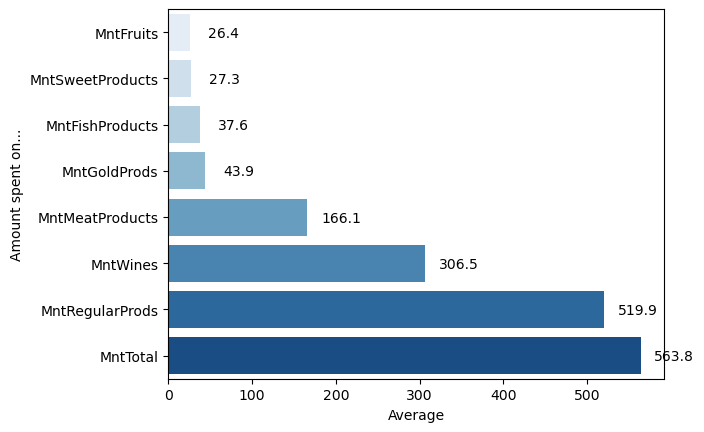

In [127]:
spending = pd.DataFrame(round(df[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=spending, palette='Blues')
plt.ylabel('Amount spent on...')

## add text labels for each bar's value
for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

Which products are performing best?

The average customer spent...

$25-50 on Fruits, Sweets, Fish, or Gold products

Over $166 on Meat products

Over $300 on Wines

Over $560 total

Food Products performing best:

Wines

Followed by meats

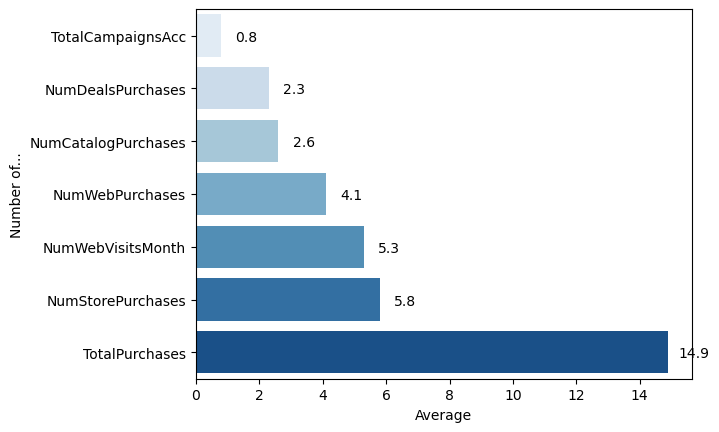

In [128]:
channels = pd.DataFrame(round(df[channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=channels, palette='Blues')
plt.ylabel('Number of...')

## add text labels for each bar's value
for p,q in zip(ax.patches, channels['Average']):
    ax.text(x=q+0.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

Which channels are underperforming?

Channels: The average customer...

Accepted less than 1 advertising campaign

Made 2 deals purchases, 2 catalog purchases, 4 web purchases, and 6 store purchases

Averaged 15 total purchases

Visited the website 5 times

Underperforming channels:

Advertising campaigns

Followed by deals, and catalog

# Multivariate Analysis


In [129]:
#Heat Map
# Use the heatmap function from the seaborn package
sns.heatmap(df,fmt="",cmap='RdYlGn',linewidths=0.30,ax=ax)

# Display the Pharma Sector Heatmap
plt.show()


To identify patterns, we will first identify feature correlations. Positive correlations between features appear red, negative correlations appear blue, and no correlation appears grey in the clustered heatmap below.

From this heatmap we can observe the following clusters of correlated features:

The "High Income" cluster:

Amount spent  are positively correlated with 'Income'

Purchasing in store, on the web, or via the catalog ('NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases') is positively correlated with 'Income'

The "underage" cluster:
Amount spent and number of purchases are negatively correlated with "underage".
Purchasing deals ('NumDealsPurchases') is positively correlated with "underage". "underage" is negatively correlated with 'Income'

The "Advertising Campaigns" cluster:
Acceptance of the advertising campaigns ('AcceptedCmp' and 'Response') are strongly positively correlated with each other
Weak positive correlation of the advertising campaigns is seen with the "High Income" cluster, and weak negative correlation is seen with the "Have Kids & Teens" cluster

Anomalies:
Surprisingly, the number of website visits in the last month ('NumWebVisitsMonth') does not correlate with an increased number of web purchases ('NumWebPurchases')
Instead, 'NumWebVisitsMonth' is positively correlated with the number of deals purchased ('NumDealsPurchases'), suggesting that suggesting that deals are an effective way of stimulating purchases on the website

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


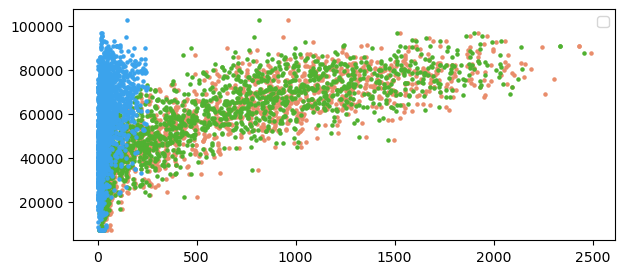

In [130]:
# multiple line plots
plt.figure(figsize = (7,3))
df2['Food PRodcuts'] = df2['MntWines'] + df2['MntFruits'] + df2['MntMeatProducts'] + df2['MntFishProducts'] +df2['MntSweetProducts']

plt.scatter(df2['Food PRodcuts'], df2['Income'],color = '#e98d6b',s = 5)
plt.scatter(df2['MntRegularProds'],df2['Income'],color = '#50b131',s = 5)
plt.scatter(df2['MntGoldProds'],df2['Income'], color ='#3ba3ec',s = 5)

# show legend
plt.legend()
#show graph
plt.show()

Plot illustrating positive effect of spending money on food products:

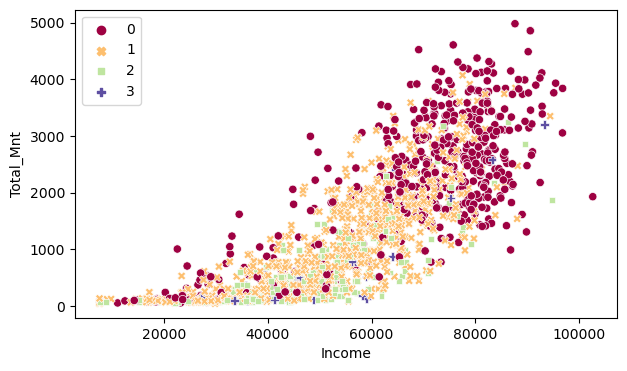

In [131]:
# multiple line plots
plt.figure(figsize = (7,4))

sns.scatterplot(data=df2, x='Income', y='Total_Mnt', hue='Underage', style='Underage',palette="Spectral")

# show legend
plt.legend()
#show graph
plt.show()

Plot depicts the fact very clearly that the more the number of children(more family members),the more expenditure increases.

# Conclusion
Summary of actionable findings to improve advertising campaign success:

The most successful advertising campaign was the most recent campaign (column name: Response)

Suggested action: Conduct future advertising campaigns using the same model recently implemented.

Advertising campaign acceptance is positively correlated with income and negatively correlated with having kids/teens

Suggested action: Create two streams of targeted advertising campaigns, one aimed at high-income individuals without kids/teens

and another aimed at lower-income individuals with kids/teens

The most successful products are wines and meats (i.e. the average customer spent the most on these items)

Suggested action: Focus advertising campaigns on boosting sales of the less popular items

The underperforming channels are deals and catalog purchases (i.e. the average customer made the fewest purchases via these channels)

The best performing channels are web and store purchases (i.e. the average customer made the most purchases via these channels)
